In [2]:
import matplotlib.pyplot as plt
import pickle
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


COMPUTER_NAME = '/home/renata'

#python3

ENCODE = 'latin1'
print('Using python {0}'.format(sys.version_info[0]))

Using python 2


In [5]:
with open('{0}/locomotion_principles/article_figs/Fig5/PlotVoxelsInFeet.pickle'.format(COMPUTER_NAME), 'rb') as handle:
    data = pickle.load(handle)

/home/renata/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(-0.5, 2.5)

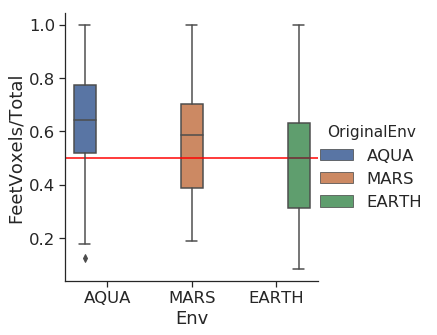

In [6]:
sns.set(font_scale=1.5)  
sns.set_style("white")
sns.set_style('ticks')
g = sns.catplot(
    data=data[data.JustOriginal == True][data.Type == 'BEST']
    , kind = 'box',
    x = 'Env', y="FeetVoxels/Total",hue='OriginalEnv', #col='Type',
    ci = 95
    )
xmax = 2.5
xmin = -0.5
for ax in g.axes.flat:
    ax.hlines(0.5,xmin,xmax,'red')
plt.xlim(xmin,xmax)
plt.xlim(xmin,xmax)

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('FeetVoxels_Total ~ C(Env)', data=data[(data.JustOriginal == True) & (data.Type == 'BEST')]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Env),0.449048,2.0,4.85332,0.009097
Residual,6.800507,147.0,NaN,NaN
